<span style="font-size:8pt"><i>ENSAM-Bordeaux, Mathématiques et informatique. Date : le 14/11/22. Auteur : Éric Ducasse. Version : 1.4</i></span>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sb
sb.init_printing()
from IPython.display import display # pour remplacer print
print("Version de sympy :", sb.__version__) 

Version de sympy : 1.11.1


# <span style="color:#0066BB"> **Calcul formel : TD n°1, première partie** </span>

<div class="alert alert-block alert-danger"> <span style="color:#800000"> <i>Pour chaque exercice, faire exécuter la partie <b>exemples</b> cellule par cellule $\left(\mathtt{Maj+Entrée}\right)$, avant de passer à la partie <b>Travail à faire</b>.</i> </span> </div>

## <span style="color: #0000BB"> *Exercice 1* </span>

### <span style="color:purple"> 1.1 Objectifs </span>

#### <i><span style="color:#005500"> Savoir faire du calcul exact avec des entiers, des fractions, des nombres transcendants<br /> et les fonctions mathématiques usuelles ; savoir vérifier une égalité. </span></i>

### <span style="color:purple"> 1.2 Exemples </span>

#### Fractions :

In [2]:
ne_marche_pas = 2/5 ; ne_marche_pas

In [3]:
F1 = sb.Rational(2,5) ; F1

In [4]:
F2 = sb.S(2)/5 ; F2

In [5]:
F1 == F2

True

* Remarque : si la fraction contient d'autres symboles que des entiers, l'utilisation de l'opérateur / fonctionne :

In [6]:
[sb.pi/3,3/(1+sb.I),2/sb.E,sb.sqrt(3)/2]

#### Nombres irrationnels :

In [7]:
L = [sb.pi,sb.E,sb.I,sb.sqrt(2)] ; L

In [8]:
a = (-sb.S(1)/2+sb.I*sb.sqrt(3)/2)**3
[sb.cos(sb.pi/4),sb.E**(sb.I*sb.pi),a]

#### Égalités :

In [9]:
[ a == 1 , a.equals(1) ]

[False, True]

In [10]:
a.simplify() == 1

True

<div class="alert alert-block alert-info">$\hspace{30mm}$<u>Moralité</u> : toujours utiliser <b><tt>equals</tt></b>.</div>

### <span style="color:purple"> 1.3 Travail à faire </span>

$a)$ Définir le nombre $\displaystyle g=\frac{1}{2} + \frac{\sqrt{5}}{2}$. Vérifier ensuite que $\displaystyle g=\frac{1}{g-1}$.

$b)$ Définir le nombre complexe $\displaystyle z=\exp\!\left(\frac{2\,\mathbb{i}\,\pi}{7}\right)$. Vérifier ensuite que $z^7=1$.

$c)$ À l'aide de la méthode <tt><b>expand</b></tt>, développer $\displaystyle(1-z)\left(\sum_{k=0}^{6}z^k\right)$.

## <span style="color: #0000BB"> *Exercice 2* </span>

### <span style="color:purple"> 2.1 Objectifs </span>

#### <i><span style="color:#005500"> Savoir définir et manipuler des expressions littérales simples (développer, factoriser,<br /> simplifier, extraire des coefficients, etc).</span></i>

### <span style="color:purple"> 2.2 Exemples </span>

#### Définition de symboles :

In [11]:
a,b,c,X,Y = sb.symbols("a,b,c,X,Y")

#### Définition d'expressions littérales :

In [12]:
ecart = Y - (a*X+b) ; ecart

In [13]:
q = (ecart**2).simplify() ; q

#### Développer et regrouper des termes :

In [14]:
d = q.expand() ; d

In [15]:
d.collect(X)

In [16]:
d.collect(Y)

#### Extraire des coefficients à partir d'une expression développée :

$\star$ Extraction des coefficients des $X^p$ :

In [17]:
A,B = d.coeff(X**2),d.coeff(X)
A,B

$\star$ Coefficient constant :

In [18]:
C = (d - A*X**2 - B*X).expand()
C

$\star$ Récapitulatif :

In [19]:
[A,B,C]

* <span style="color:#600000"> *Si l'expression n'est pas développée, cela ne marche pas :* </span>

In [20]:
q, q.coeff(X**2), q.coeff(X) 

* <i>Variante, qui utilise la définition de polynômes par le type</i> <span style="color:#0000A0"><b><tt>sympy.Poly</tt></b></span> :

In [21]:
sb.Poly(d, X).all_coeffs()

In [22]:
sb.Poly(q, X) # Fait le développement sur la forme factorisée

In [23]:
sb.Poly((X**2-a)**2, X).all_coeffs()

#### Factoriser :

In [24]:
( X**4 - 1 ).factor()

In [25]:
( X**4 + 1 ).factor()

In [26]:
( X**4 + 1 ).factor( extension=sb.I )

In [27]:
polynome = sb.Poly( X**4 + 1, X) ; polynome

In [28]:
racines = [ polynome.root(i).factor() for i in range( polynome.degree() ) ] ; racines

In [29]:
[ x_0.simplify() for x_0 in polynome.all_roots() ]

In [30]:
polynome_factorise = 1
for x_0 in racines : 
    polynome_factorise *= (X-x_0)
polynome_factorise    

In [31]:
(X**4+1).equals(polynome_factorise)

True

#### Définir des symboles en faisant des hypothèses sur ceux-ci :

In [32]:
theta = sb.symbols("theta", real=True)
k = sb.symbols("k", integer=True)
[sb.sin(theta+2*sb.pi*k).simplify(),sb.sin(theta+2*sb.pi*k).trigsimp()]

In [33]:
sb.cos(sb.pi*k)

In [34]:
m = sb.symbols("m", positive=True)
sb.sin(theta+sb.pi*m).equals( (-1)**m * sb.sin(theta) ) # Ne renvoie rien : indétermination

In [35]:
m = sb.symbols("m", integer=True)
sb.sin(theta+sb.pi*m).equals( (-1)**m * sb.sin(theta) )

True

### <span style="color:purple"> 2.3 Travail à faire </span>

$a)$ Définir $z=x+\mathbb{i}\,y$ en spécifiant que $x$ et $y$ sont réels, puis définir la liste $\mathtt{LP}=\left[z^2,z^3,z^4\right]$.

$b)$ Développer chaque élément de la liste <tt><b>LP</b></tt> et déterminer le coefficient de $\mathbb{i}$. <br />En déduire les parties réelle et imaginaire de chacun des éléments de la liste <tt><b>LP</b></tt>.

$c)$ Factoriser chacune des expressions trouvées à la question précédente.

$d)$ Reprendre l'exercice par une méthode différente, en utilisant les fonctions  <span style="color:#0000C0"><b><tt>re</tt></b></span> et <span style="color:#0000C0"><b><tt>im</tt></b></span> de <span style="color:#0000C0"><b><tt>sympy</tt></b></span>.

$e)$ Recommencer en utilisant cette fois la fonction <b><tt><span style="color:#0000C0">conjugate</span></tt></b> de <b><tt><span style="color:#0000C0">sympy</span></tt></b>.

## <span style="color: #0000BB"> *Exercice 3* </span>

### <span style="color:purple"> 3.1 Objectifs </span>

#### <i><span style="color:#005500"> Savoir créer et manipuler des expressions fractionnaires.</span></i>

### <span style="color:purple"> 3.2 Exemples </span>

#### Numérateur et dénominateur :

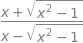

In [36]:
x = sb.symbols("x", real=True)
F = (x+sb.sqrt(x**2-1))/(x-sb.sqrt(x**2-1)) ; F

In [37]:
N,D = F.as_numer_denom() ; (N,D)

<i>Une simplification pour laquelle</i> <span style="color:#0000A0"><b><tt>sympy</tt></b></span> <i>n'est pas programmé :</i>

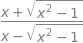

In [38]:
F.simplify()

In [39]:
# Simplification « à la main »
N2,D2 = [ (X*N).expand() for X in (N,D) ] 
F2 = N2/D2 ; F2

In [40]:
F.equals(F2)

True

#### Écriture sous forme d'une unique fraction :

In [41]:
x,y = sb.symbols("x,y", real=True)
S = 1/x + y/(x+2*y) ; S

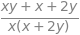

In [42]:
T = S.together() ; T

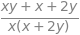

In [43]:
S.factor()

#### Décomposition en éléments simples :

In [44]:
T.apart(x)

In [45]:
T.apart(y)

### <span style="color:purple"> 3.3 Travail à faire </span>

$a)$ Définir les expressions symboliques suivantes : $\displaystyle G=\frac{5}{2+p}$ et $\displaystyle R=\frac{a}{p}$, où $p$ et $a$ sont des symboles.

$b)$ On pose : $\displaystyle H=\frac{G}{1+R\,G}$. Montrer que le dénominateur de H peut s'écrire : $D = (p+1+\sqrt{1-5\,a})\,(p+1-\sqrt{1-5\,a})$.

<div class="alert alert-block alert-info">$\hspace{30mm}$Penser à simplifier le résultat avant de le nommer <b><tt>H</tt></b>.</div>

$c)$ On pose : $\displaystyle H_0=\frac{G}{1+R_0\,G}$, où $\displaystyle R_0=\frac{3}{20\,p}$. Calculer $H_0$ sous forme factorisée puis décomposer $H_0$ en éléments simples.

$d)$ Essayer de décomposer $H$ en éléments simples, puis écrire <b><tt>H.apart(p, full=True).doit()</tt></b>.